<a href="https://colab.research.google.com/github/MuhammadDhiyaul/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Transformasi Linier Brightness

Formula : g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


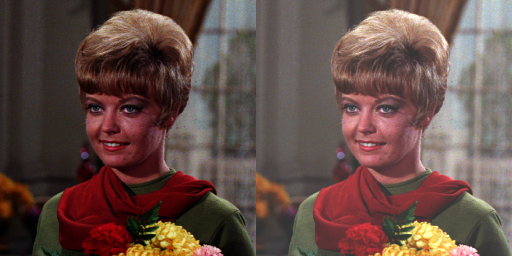

In [3]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Genap_2022/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simpel tanpa for loop
# Brightness_image = cv.convert.ScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



#TUGAS PRAKTIKUM 
1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut :

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


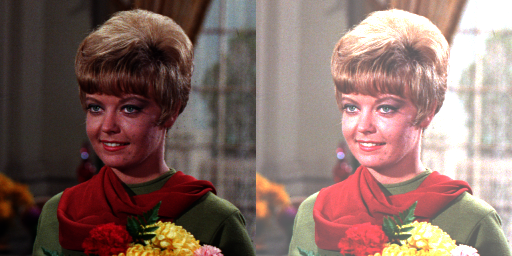

In [4]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Genap_2022/female.tiff')
final_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      final_image[y, x, c] = np.clip(contrast * (original[y, x, c] + brightness), 0, 255)

#cara simple tanpa for loop
#final_frame = cv.converScaleAbs(original, contrast, brightness)

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------
Masukkan tingkat kecerahan: 40


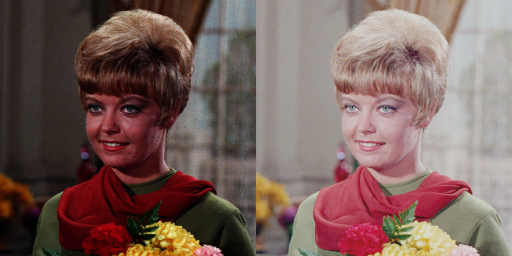

In [5]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------')
try:
  r_value = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Genap_2022/female.tiff')
log_image = np.zeros(original.shape, original.dtype)

#cara simple tanpa for loop
c = r_value
log_image = c * (np.log(original + 1))

log_image = np.array(log_image, dtype = np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging,  lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,sehingga menghasilkan keluaran seperti berikut:

In [6]:
original = cv.imread('/content/drive/MyDrive/PCVK_Genap_2022/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
lightness_img = np.zeros(original.shape, original.dtype)

a. Averaging

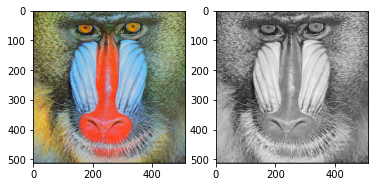

In [7]:
def conv_averaging(img_ori):
  grayValue = (img_ori[:,:,0] / 3) + (img_ori[:,:,1] / 3) + (img_ori[:,:,2] / 3)
  averaging_img = grayValue.astype(np.uint8)
  return averaging_img
averaging = conv_averaging(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(averaging, cmap='gray')

b. Lightness

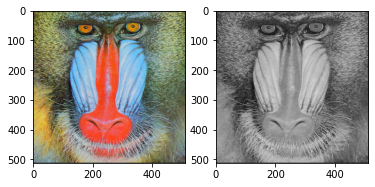

In [8]:
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    lightness_img[y,x,:] = int((max(original[y,x,:]) / 2) + (min(original[y,x,:]) / 2))
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(lightness_img, cmap='gray')

c. Luminance

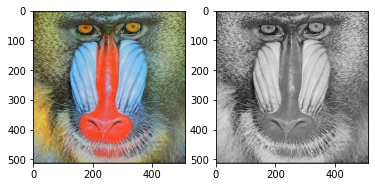

In [9]:
def conv_luminance(img_ori):
  grayValue = (0.2126 * img_ori[:,:,0]) + (0.7152 * img_ori[:,:,1]) + (0.0722 * img_ori[:,:,2])
  luminance_img = grayValue.astype(np.uint8)
  return luminance_img
luminance = conv_luminance(original)
fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(luminance, cmap='gray')

4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut:

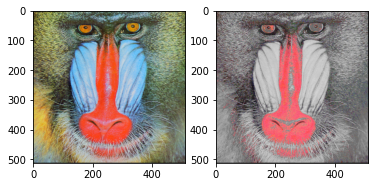

In [11]:
original = cv.imread('/content/drive/MyDrive/PCVK_Genap_2022/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

lower_range = np.array([0,0,0])  # Set the Lower range value of color in BGR
upper_range = np.array([255,110,120])   # Set the Upper range value of color in BGR
mask = cv.inRange(original,lower_range,upper_range) # Create a mask with range
result = cv.bitwise_and(original,original,mask = mask)  # Performing bitwise and operation with mask in img variable

bw = cv.cvtColor(original,cv.COLOR_BGR2GRAY)  # Converting the Original image to Gray
bw_bgr = cv.cvtColor(bw,cv.COLOR_GRAY2BGR) # Converting the Gray image to BGR format
result2 = cv.bitwise_or(bw_bgr,result) # Performing Bitwise OR operation with gray bgr image and previous result image

fix, ax = plt.subplots(1, 2)
ax[0].imshow(original)
ax[1].imshow(result2)